#**Natural Language Proessing** 

In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

##**Importing the dataset** 

In [75]:
data = pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t',quoting = 3)

In [76]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


##**Cleaning the texts**

In [77]:
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # remove all the stopwords that can cause error in the learning
from nltk.stem.porter import PorterStemmer #similar meaning sentences will be removed (loved -> love )
corpus = []
for i in range(0,1000):
  #regular expressions. remove all the non-alphabet things to space,(symbols , non-english characters)
  review = re.sub('[^a-zA-Z]',' ',data['Review'][i])
  review = review.lower()
  review = review.split() #split the words for the cleaning 
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not') # remove not from stopwords so it must be included in the texts 
  review = [ps.stem(word) for word in review if not word in set(all_stopwords )]  #stemmer , remove the stopwords that donot contribute in the model , he/she ,they, them will not needed in review 
  review = ' '.join(review)
  corpus.append(review)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

##**Creating the Bags of Words**

In [79]:
#tokenisation process
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1550) #changes the data to 1500 most frequent words 
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:,-1].values #created the sparse matrices 

In [80]:
len(x[0])

1550

##**Spliting the data in to training and testing set**

In [81]:
from sklearn.model_selection import train_test_split 
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size= 0.2 ,random_state = 0)

##**Naive Bayes Model** 

In [82]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train) 

GaussianNB()

In [83]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1])

In [84]:
from sklearn.metrics import confusion_matrix , accuracy_score 
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[55 42]
 [12 91]]


In [85]:
accuracy_score(y_test,y_pred)

0.73

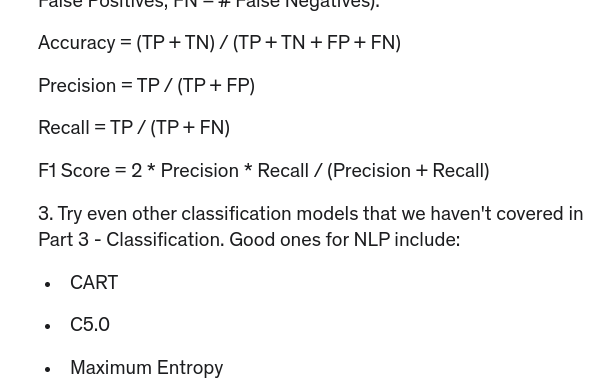